## Train a Deep Neural Network on CIFAR-10 dataset using normal convolution, atrous convoultio, spatially separable convolution, depthwise separable convolution and grouped convolution- Final network validation accuracy-76%

In [1]:
# Uncomment and run the line below if you don't have keras and hvplot installed
# !pip install -q keras
!pip install hvplot

     |████████████████████████████████| 2.3MB 3.5MB/s 
     |████████████████████████████████| 4.0MB 31.9MB/s 
     |████████████████████████████████| 71kB 29.1MB/s 


### Import the necessary packages

In [33]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.datasets import cifar10
from collections import Counter 
import holoviews as hv
from keras.callbacks import ModelCheckpoint

from random import sample 
import holoviews as hv 
import random

hv.extension('matplotlib')

% matplotlib inline
np.random.seed(2017) 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

### Load the CIFAR10 dataset pre-available with keras package: This dataset contains 32X32X3 small sized images of different classes namely -> Airplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Ship,Truck and their corresponding labels

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

### Check the distribution of objects in train and test dataset. There does not see to be bias in the distribution of objects. It seems to be uniform

In [35]:
print("Distribution of digits in train data {}".format(dict(Counter(train_labels.ravel()))))
print("Distribution of digits in test data {}".format(dict(Counter(test_labels.ravel()))))

Distribution of digits in train data {6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000}
Distribution of digits in test data {3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000}


### Show some meta information about the data and a sample image

There are 50000 number images in the training dataset
There are 10000 number images in the test dataset

Figure below shows, how a sample image look likes


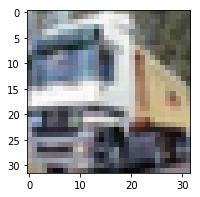

In [36]:
print("There are {} number images in the training dataset".format(train_features.shape[0]))
print("There are {} number images in the test dataset\n".format(test_features.shape[0]))
print("Figure below shows, how a sample image look likes")

plt.figure(figsize=(8,3))
plt.imshow(train_features[1])

### let us see some sample images, how they look in train and test data using Hvplot. Each image is of the size 32 X 32 X 3

:Layout
   .RGB.Train_Airplane.I     :RGB   [x,y]   (R,G,B)
   .RGB.Train_Airplane.II    :RGB   [x,y]   (R,G,B)
   .RGB.Train_Airplane.III   :RGB   [x,y]   (R,G,B)
   .RGB.Test_Airplane.I      :RGB   [x,y]   (R,G,B)
   .RGB.Test_Airplane.II     :RGB   [x,y]   (R,G,B)
   .RGB.Test_Airplane.III    :RGB   [x,y]   (R,G,B)
   .RGB.Train_Automobile.I   :RGB   [x,y]   (R,G,B)
   .RGB.Train_Automobile.II  :RGB   [x,y]   (R,G,B)
   .RGB.Train_Automobile.III :RGB   [x,y]   (R,G,B)
   .RGB.Test_Automobile.I    :RGB   [x,y]   (R,G,B)
   .RGB.Test_Automobile.II   :RGB   [x,y]   (R,G,B)
   .RGB.Test_Automobile.III  :RGB   [x,y]   (R,G,B)
   .RGB.Train_Bird.I         :RGB   [x,y]   (R,G,B)
   .RGB.Train_Bird.II        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Bird.III       :RGB   [x,y]   (R,G,B)
   .RGB.Test_Bird.I          :RGB   [x,y]   (R,G,B)
   .RGB.Test_Bird.II         :RGB   [x,y]   (R,G,B)
   .RGB.Test_Bird.III        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Cat.I          :RGB   [x,y]   (R,G,B)
   .RGB.Train_Cat.II         :RGB   [x,y]   (R,G,B)
   .RGB.Train_Cat.III        :RGB   [x,y]   (R,G,B)
   .RGB.Test_Cat.I           :RGB   [x,y]   (R,G,B)
   .RGB.Test_Cat.II          :RGB   [x,y]   (R,G,B)
   .RGB.Test_Cat.III         :RGB   [x,y]   (R,G,B)
   .RGB.Train_Deer.I         :RGB   [x,y]   (R,G,B)
   .RGB.Train_Deer.II        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Deer.III       :RGB   [x,y]   (R,G,B)
   .RGB.Test_Deer.I          :RGB   [x,y]   (R,G,B)
   .RGB.Test_Deer.II         :RGB   [x,y]   (R,G,B)
   .RGB.Test_Deer.III        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Dog.I          :RGB   [x,y]   (R,G,B)
   .RGB.Train_Dog.II         :RGB   [x,y]   (R,G,B)
   .RGB.Train_Dog.III        :RGB   [x,y]   (R,G,B)
   .RGB.Test_Dog.I           :RGB   [x,y]   (R,G,B)
   .RGB.Test_Dog.II          :RGB   [x,y]   (R,G,B)
   .RGB.Test_Dog.III         :RGB   [x,y]   (R,G,B)
   .RGB.Train_Frog.I         :RGB   [x,y]   (R,G,B)
   .RGB.Train_Frog.II        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Frog.III       :RGB   [x,y]   (R,G,B)
   .RGB.Test_Frog.I          :RGB   [x,y]   (R,G,B)
   .RGB.Test_Frog.II         :RGB   [x,y]   (R,G,B)
   .RGB.Test_Frog.III        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Horse.I        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Horse.II       :RGB   [x,y]   (R,G,B)
   .RGB.Train_Horse.III      :RGB   [x,y]   (R,G,B)
   .RGB.Test_Horse.I         :RGB   [x,y]   (R,G,B)
   .RGB.Test_Horse.II        :RGB   [x,y]   (R,G,B)
   .RGB.Test_Horse.III       :RGB   [x,y]   (R,G,B)
   .RGB.Train_Ship.I         :RGB   [x,y]   (R,G,B)
   .RGB.Train_Ship.II        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Ship.III       :RGB   [x,y]   (R,G,B)
   .RGB.Test_Ship.I          :RGB   [x,y]   (R,G,B)
   .RGB.Test_Ship.II         :RGB   [x,y]   (R,G,B)
   .RGB.Test_Ship.III        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Truck.I        :RGB   [x,y]   (R,G,B)
   .RGB.Train_Truck.II       :RGB   [x,y]   (R,G,B)
   .RGB.Train_Truck.III      :RGB   [x,y]   (R,G,B)
   .RGB.Test_Truck.I         :RGB   [x,y]   (R,G,B)
   .RGB.Test_Truck.II        :RGB   [x,y]   (R,G,B)
   .RGB.Test_Truck.III       :RGB   [x,y]   (R,G,B)
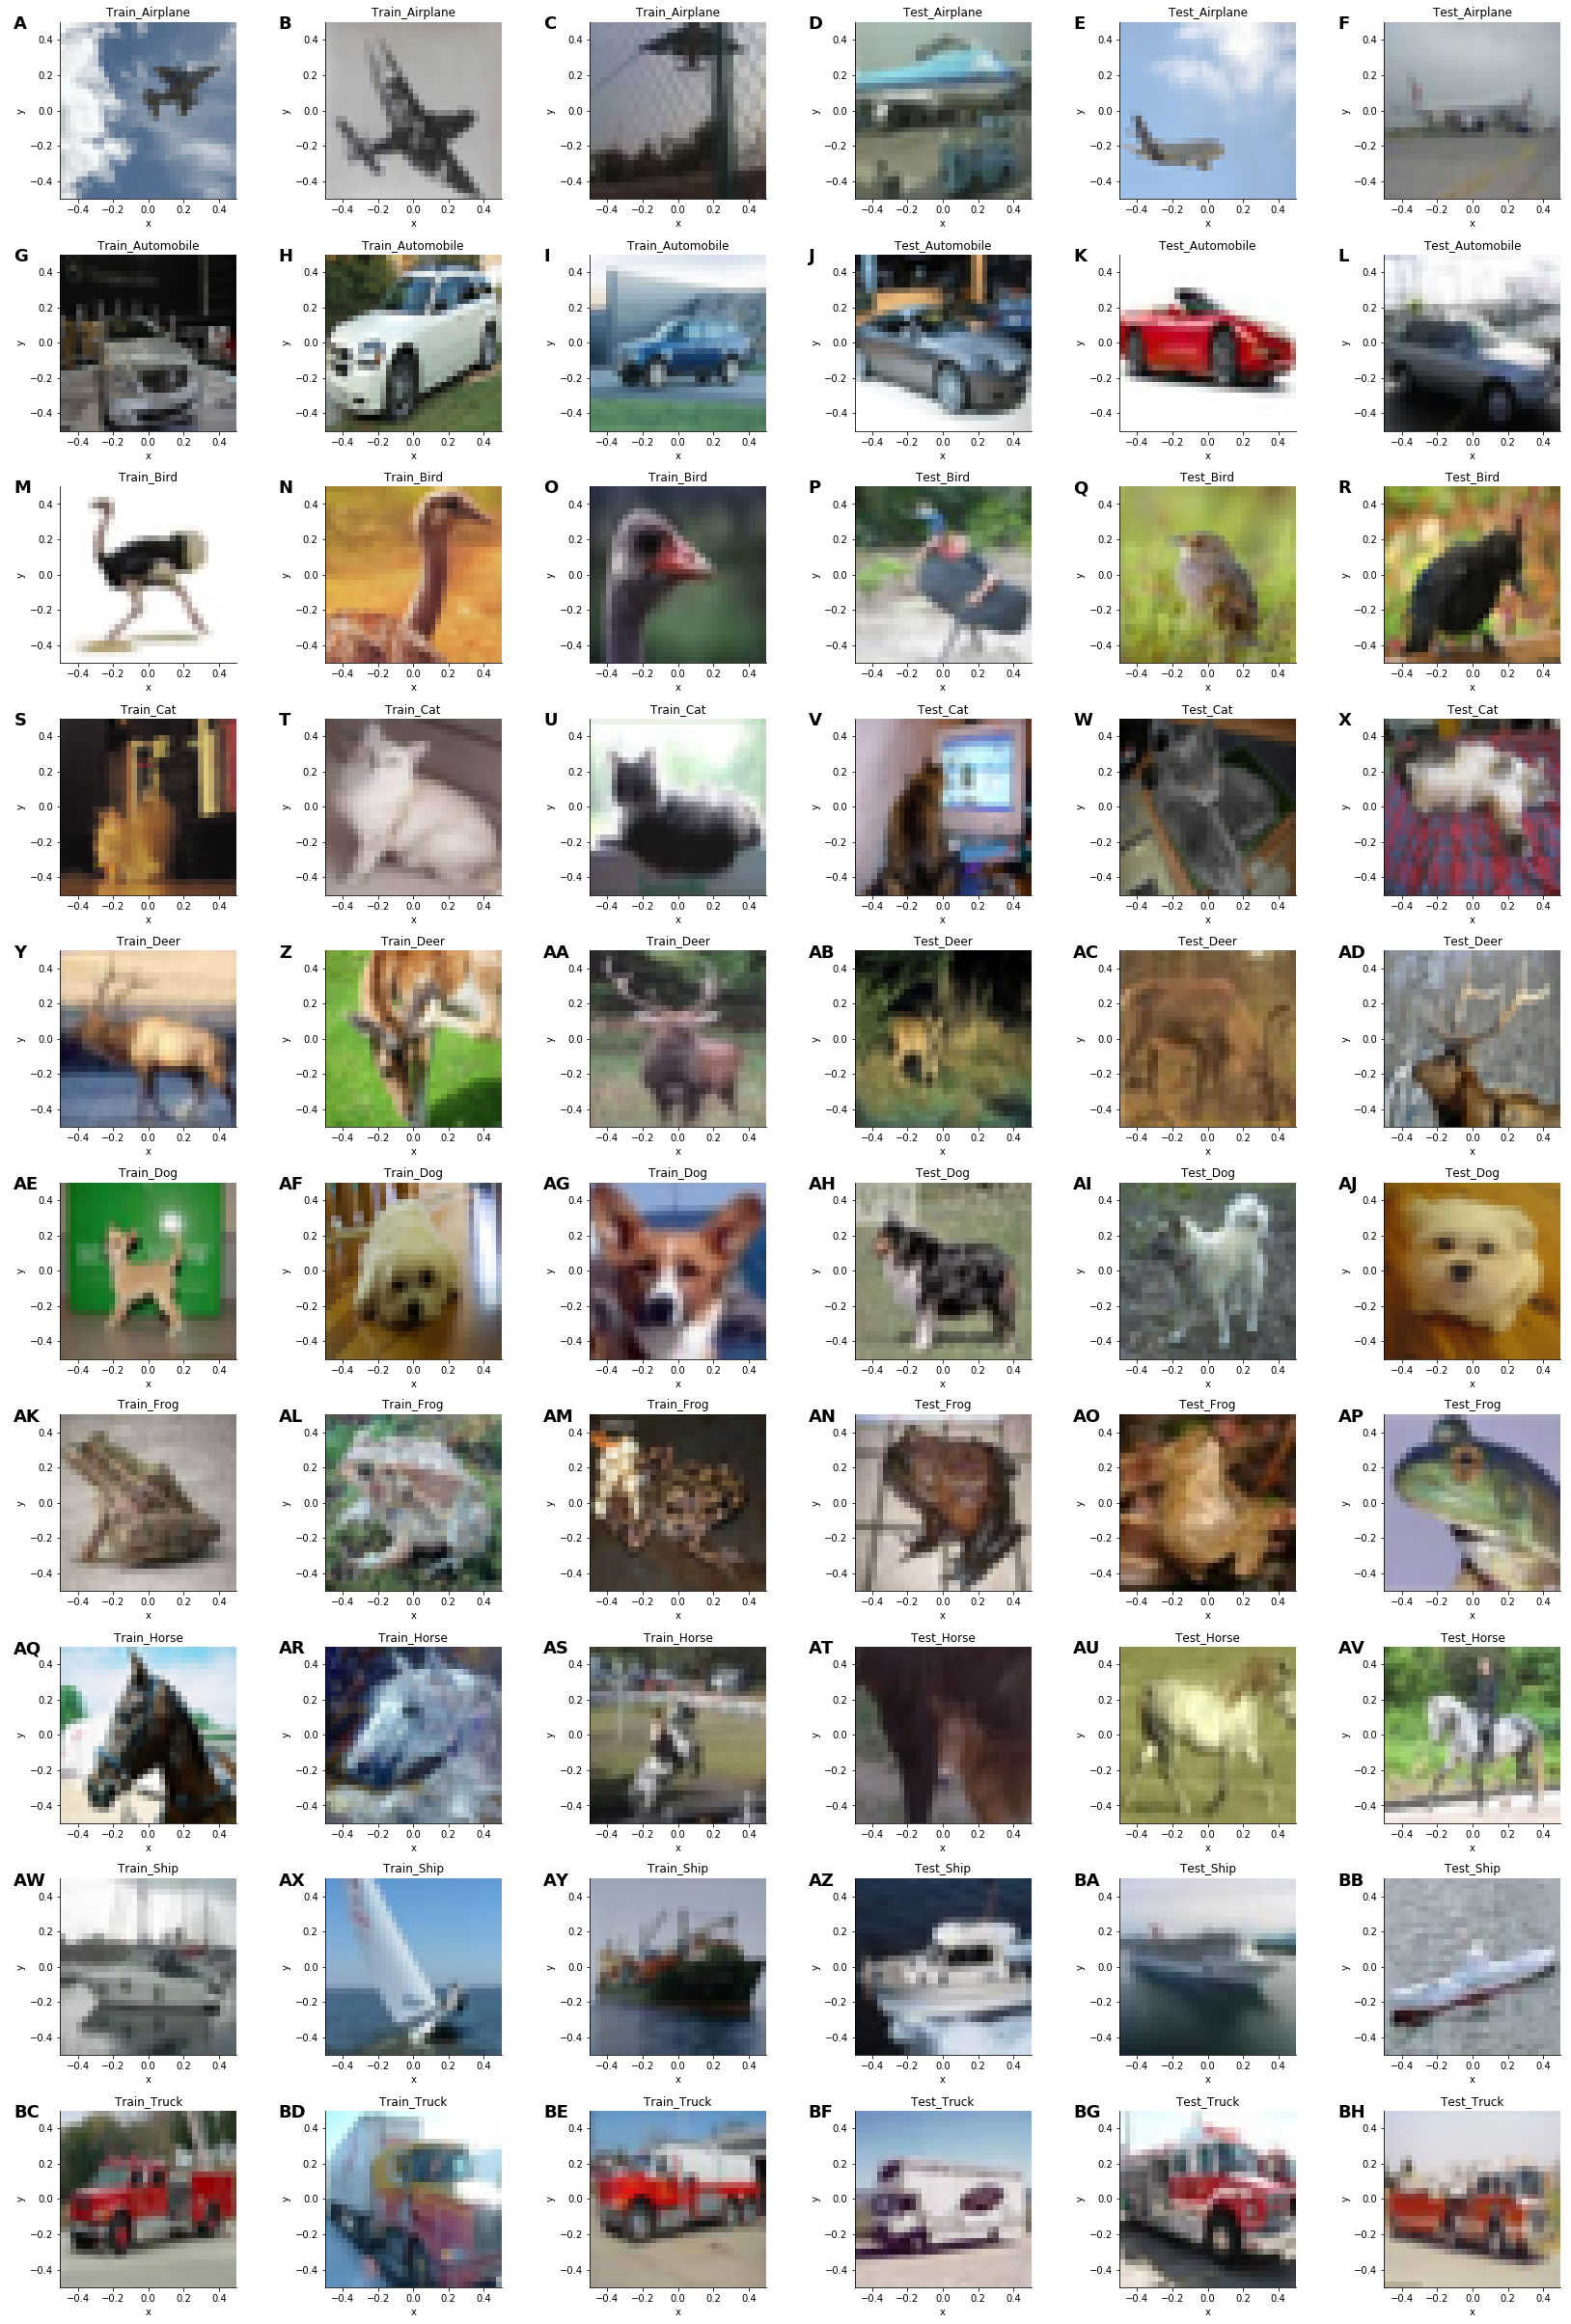

In [0]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']
random.seed(999) ## For reproducibility
nums=list(range(0,10))
index_list_train=[]

for i in nums:  
  index_list_train.append(sample(list(np.where(train_labels ==i)[0]),3))
  
index_list_test=[]
for i in nums:  
  index_list_test.append(sample(list(np.where(test_labels ==i)[0]),3))
  
train_test_ind=[]
for i in range(0,10):
  a=[]
  for item in index_list_train[i]:
    a.append(hv.RGB(train_features[item],label="Train_"+class_names[train_labels[item][0]]))  
  b=[]
  for item in index_list_test[i]:
    b.append(hv.RGB(test_features[item],label="Test_"+class_names[test_labels[item][0]]))
  train_test_ind.append(a+b)
                                                             
train_test_ind_flat=[item for sublist in train_test_ind for item in sublist]                                                             

img=train_test_ind_flat[0]
for i in range(1,len(train_test_ind_flat)):
  img=img+train_test_ind_flat[i]
  
img.cols(6) # A very cool way to plot grids of images. Very complex code to do the same in matplotlib

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Conver the datatype and standardize the images

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [55]:
cv2

<tf.Tensor 'conv2d_89/Relu:0' shape=(?, 1, 1, 10) dtype=float32>

# Part B
### Design 1: Add in order normal convolution, spatially separable convolution, depthwise convolution and grouped convolution. This network contains 115,992 parameters. In 24 epochs validation accuracy is just 40% which means network is having difficulty training

In [56]:
from keras.layers.convolutional import DepthwiseConv2D
visible1 = Input(shape=(32,32,3))
conv11 = Convolution2D(32, kernel_size=(3,3), activation='relu')(visible1)
conv12 = Convolution2D(32, kernel_size=(3,1), activation='relu')(conv11) # Spatially Separable convolution
conv13 = Convolution2D(512, kernel_size=(1,3), activation='relu')(conv12) # Spatially Separable convolution
conv14=  DepthwiseConv2D(kernel_size=(3,3), activation='relu')(conv13)
conv15 = Convolution2D(32, kernel_size=(1,1), activation='relu')(conv14)

# Group1
# convg21=Convolution2D(64, kernel_size=(3,3), activation='relu')(conv15)
poolg21 = MaxPooling2D(pool_size=(2, 2))(conv15)
convg22=Convolution2D(64, kernel_size=(3,3), activation='relu')(poolg21)

# Group2
convg31=Convolution2D(64, kernel_size=(3,3), activation='relu',dilation_rate=2)(conv15)
poolg31 = MaxPooling2D(pool_size=(2, 2))(convg31)

merge = concatenate([convg22, poolg31])

mp=MaxPooling2D(pool_size=(2, 2))(merge)
cv1=Convolution2D(10, kernel_size=(1,1), activation='relu')(mp)
cv2=Convolution2D(10, kernel_size=(5,5), activation='relu')(cv1)


flat = Flatten()(cv2)

output = Activation('softmax')(flat)

model = Model(inputs=[visible1], outputs=output)

# model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# hidden1 = Dense(10, activation='relu')(flat)
# hidden2 = Dense(10, activation='relu')(hidden1)
# output = Dense(1, activation='sigmoid')(hidden2)

print(model.summary())


W0902 15:17:42.513202 140591207872384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0902 15:17:42.539306 140591207872384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_90 (Conv2D)              (None, 30, 30, 32)   896         input_25[0][0]                   
__________________________________________________________________________________________________
conv2d_91 (Conv2D)              (None, 28, 30, 32)   3104        conv2d_90[0][0]                  
__________________________________________________________________________________________________
conv2d_92 (Conv2D)              (None, 28, 28, 512)  49664       conv2d_91[0][0]                  
____________________________________________________________________________________________

In [59]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(train_features, train_labels, batch_size=64, epochs=80, verbose=1,validation_data=(test_features, test_labels),callbacks=callbacks_list)

W0902 15:19:31.272594 140591207872384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0902 15:19:31.393170 140591207872384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 84s 2ms/step - loss: 2.1596 - acc: 0.2009 - val_loss: 2.0563 - val_acc: 0.2644

Epoch 00001: val_acc improved from -inf to 0.26440, saving model to weights.best.hdf5
Epoch 2/80
50000/50000 [==============================] - 76s 2ms/step - loss: 2.0011 - acc: 0.2929 - val_loss: 1.9809 - val_acc: 0.3005

Epoch 00002: val_acc improved from 0.26440 to 0.30050, saving model to weights.best.hdf5
Epoch 3/80
50000/50000 [==============================] - 76s 2ms/step - loss: 1.9238 - acc: 0.3220 - val_loss: 1.8804 - val_acc: 0.3394

Epoch 00003: val_acc improved from 0.30050 to 0.33940, saving model to weights.best.hdf5
Epoch 4/80
50000/50000 [==============================] - 76s 2ms/step - loss: 1.8703 - acc: 0.3388 - val_loss: 1.8585 - val_acc: 0.3481

Epoch 00004: val_acc improved from 0.33940 to 0.34810, saving model to weights.best.hdf5
Epoch 5/80
50000/50000 [=====================

KeyboardInterrupt: ignored

### Design 2: Lets try to improve over the previous network. Add more convoultion layers instead of jumping from 32 to 512 kernels directly. This network achieves 70% validation accuracy but then kind of stops improving and heavy overfitting happens.

In [92]:
from keras.layers.convolutional import DepthwiseConv2D
visible1 = Input(shape=(32,32,3))
conv11 = Convolution2D(32, kernel_size=(3,3), activation='relu')(visible1)
conv111 = Convolution2D(64, kernel_size=(3,3), activation='relu')(conv11)
conv112 = Convolution2D(128, kernel_size=(3,3), activation='relu')(conv111)
conv12 = Convolution2D(128, kernel_size=(3,1), activation='relu')(conv112)
conv13 = Convolution2D(256, kernel_size=(1,3), activation='relu')(conv12)
conv14=  DepthwiseConv2D(kernel_size=(3,3), activation='relu')(conv13)
conv15 = Convolution2D(32, kernel_size=(1,1), activation='relu')(conv14)

# Group1
# convg21=Convolution2D(64, kernel_size=(3,3), activation='relu')(conv15)
poolg21 = MaxPooling2D(pool_size=(2, 2))(conv15)
convg22=Convolution2D(64, kernel_size=(3,3), activation='relu')(poolg21)

# Group2
convg31=Convolution2D(64, kernel_size=(3,3), activation='relu',dilation_rate=2)(conv15)
poolg31 = MaxPooling2D(pool_size=(2, 2))(convg31)

merge = concatenate([convg22, poolg31])

mp=MaxPooling2D(pool_size=(2, 2))(merge)
cv1=Convolution2D(32, kernel_size=(1,1), activation='relu')(mp)
cv2=Convolution2D(10, kernel_size=(4,4))(cv1)


flat = Flatten()(cv2)

output = Activation('softmax')(flat)

model = Model(inputs=[visible1], outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


print(model.summary())


Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_274 (Conv2D)             (None, 30, 30, 32)   896         input_46[0][0]                   
__________________________________________________________________________________________________
conv2d_275 (Conv2D)             (None, 28, 28, 64)   18496       conv2d_274[0][0]                 
__________________________________________________________________________________________________
conv2d_276 (Conv2D)             (None, 26, 26, 128)  73856       conv2d_275[0][0]                 
___________________________________________________________________________________________

In [82]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(train_features, train_labels, batch_size=64, epochs=80, verbose=1,validation_data=(test_features, test_labels),callbacks=callbacks_list)

Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 68s 1ms/step - loss: 1.7539 - acc: 0.3573 - val_loss: 1.5423 - val_acc: 0.4533

Epoch 00001: val_acc improved from -inf to 0.45330, saving model to weights.best.hdf5
Epoch 2/80
50000/50000 [==============================] - 66s 1ms/step - loss: 1.3950 - acc: 0.4965 - val_loss: 1.2967 - val_acc: 0.5312

Epoch 00002: val_acc improved from 0.45330 to 0.53120, saving model to weights.best.hdf5
Epoch 3/80
50000/50000 [==============================] - 66s 1ms/step - loss: 1.2376 - acc: 0.5575 - val_loss: 1.2150 - val_acc: 0.5640

Epoch 00003: val_acc improved from 0.53120 to 0.56400, saving model to weights.best.hdf5
Epoch 4/80
50000/50000 [==============================] - 66s 1ms/step - loss: 1.1285 - acc: 0.5997 - val_loss: 1.1293 - val_acc: 0.6018

Epoch 00004: val_acc improved from 0.56400 to 0.60180, saving model to weights.best.hdf5
Epoch 5/80
50000/50000 [=====================

KeyboardInterrupt: ignored

### Design 3: Lets try to improve over the previous network. Add more convoultion layers instead of jumping from 32 to 512 kernels directly. Also add Batch Normalization. Validation accuracy -> 76%

In [93]:
from keras.layers.convolutional import DepthwiseConv2D
visible1 = Input(shape=(32,32,3))
conv11 = Convolution2D(32, kernel_size=(3,3), activation='relu')(visible1)
bn1= BatchNormalization()(conv11)
conv111 = Convolution2D(64, kernel_size=(3,3), activation='relu')(bn1)
bn2= BatchNormalization()(conv111)
conv112 = Convolution2D(128, kernel_size=(3,3), activation='relu')(bn2)
bn3= BatchNormalization()(conv112)
conv12 = Convolution2D(128, kernel_size=(3,1), activation='relu')(bn3)
bn4= BatchNormalization()(conv12)
conv13 = Convolution2D(256, kernel_size=(1,3), activation='relu')(bn4)
bn5= BatchNormalization()(conv13)
conv14=  DepthwiseConv2D(kernel_size=(3,3), activation='relu')(bn5)
conv15 = Convolution2D(32, kernel_size=(1,1), activation='relu')(conv14)
bn6= BatchNormalization()(conv15)

# Group1
# convg21=Convolution2D(64, kernel_size=(3,3), activation='relu')(conv15)
poolg21 = MaxPooling2D(pool_size=(2, 2))(bn6)
convg22=Convolution2D(64, kernel_size=(3,3), activation='relu')(poolg21)
bn7= BatchNormalization()(convg22)

# Group2
convg31=Convolution2D(64, kernel_size=(3,3), activation='relu',dilation_rate=2)(bn6)
bn8= BatchNormalization()(convg31)
poolg31 = MaxPooling2D(pool_size=(2, 2))(bn8)

merge = concatenate([convg22, poolg31])

mp=MaxPooling2D(pool_size=(2, 2))(merge)
cv1=Convolution2D(32, kernel_size=(1,1), activation='relu')(mp)
bn9= BatchNormalization()(cv1)
cv2=Convolution2D(10, kernel_size=(4,4))(bn9)
bn10= BatchNormalization()(cv2)

flat = Flatten()(cv2)

output = Activation('softmax')(flat)

model = Model(inputs=[visible1], outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


print(model.summary())


Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_47 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_284 (Conv2D)             (None, 30, 30, 32)   896         input_47[0][0]                   
__________________________________________________________________________________________________
batch_normalization_62 (BatchNo (None, 30, 30, 32)   128         conv2d_284[0][0]                 
__________________________________________________________________________________________________
conv2d_285 (Conv2D)             (None, 28, 28, 64)   18496       batch_normalization_62[0][0]     
___________________________________________________________________________________________

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(train_features, train_labels, batch_size=64, epochs=30, verbose=1,validation_data=(test_features, test_labels),callbacks=callbacks_list)

Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 91s 2ms/step - loss: 1.4349 - acc: 0.4846 - val_loss: 1.4396 - val_acc: 0.5056

Epoch 00001: val_acc improved from -inf to 0.50560, saving model to weights.best.hdf5
Epoch 2/80
50000/50000 [==============================] - 85s 2ms/step - loss: 1.0322 - acc: 0.6352 - val_loss: 1.0916 - val_acc: 0.6181

Epoch 00002: val_acc improved from 0.50560 to 0.61810, saving model to weights.best.hdf5
Epoch 3/80
50000/50000 [==============================] - 85s 2ms/step - loss: 0.8691 - acc: 0.6940 - val_loss: 1.0058 - val_acc: 0.6444

Epoch 00003: val_acc improved from 0.61810 to 0.64440, saving model to weights.best.hdf5
Epoch 4/80
50000/50000 [==============================] - 85s 2ms/step - loss: 0.7639 - acc: 0.7334 - val_loss: 0.9789 - val_acc: 0.6618

Epoch 00004: val_acc improved from 0.64440 to 0.66180, saving model to weights.best.hdf5
Epoch 5/80
50000/50000 [=====================